<h1> MTH4000 Programming in Python I</h1>
<h2> Week 10 Lecture Notes</h2>
<h3><em> Dr Matthew Lewis and Prof. Thomas Prellberg </em></h3>

Now that we have discussed strings in meticulous detail, we have (nearly) covered all built-in data types that Python recognises.  It is possible however, for coders to develop their own data types. We won't have time to practice this ourselves (this will be done in <em>MTH5005 Programming in Python II</em>), but we can take a look at some data types that exist only in modules from the extended Python library.

In particular, we will explore two modules that provide indispensable tools for mathematicians; <b>NumPy</b> and <b>Pandas</b>.  Each of these modules constructs a new type of data that could prove extremely useful to us.  NumPy defines <b>arrays</b>, which provide implementations of constructions common to linear algebra.  Pandas defines <b>DataFrames</b>, which include methods that aid in data analysis.  This week, we focus on NumPy.

<h2> NumPy </h2>

<em>NumPy</em>, a contraction of <em>Num</em>erical <em>Py</em>thon, is a package that allows for the construction of multidimensional arrays of numeric data, and includes a library of many functions to process such arrays.  Among the most common uses of these arrays are to implement the concepts of vectors and matrices (constructions possibly familiar to us from A Level, but certainly about to be familiar to us from <em>MTH4215 Vectors &amp; Matrices</em>).

<h2> Arrays and Array Attributes </h2>

Let's now construct some of these arrays.  We begin by importing NumPy which, as seen previously, is usually imported under the alias <code>np</code>.

In [252]:
import numpy as np

Once this has been done, we are free to build an array.  This can be done with a similar syntax to how we would build a list..  The only subtlety, is that we have to feed this list of lists into NumPy's <code>array</code> function.

In [254]:
a = np.array([1, 2, 3])

This is certainly a new type of object.  To demonstrate this, we call the <code><span style="color: rgb(0, 136, 0);">type</span></code> function with argument <code>a</code>.

In [256]:
type(a)

numpy.ndarray

This tells us that the type of data is defined in a file called <code>numpy</code> (something we already knew), and is assigned to the name <code>ndarray</code>.  This name is slightly different to the name we have given it above, but the extra <code>nd</code> (short for "$n$-dimensional") is used to differentiate it from the <code>array</code> object in the <a href="https://docs.python.org/3/library/array.html"><code>array</code></a> module in the <a href="https://docs.python.org/3/library/index.html">Python Standard Library</a>.  This is a completely different type of data however, and so we will not mention it any further.

Even though we will ignore the <code>nd</code> and almost always refer to these objects as <em>arrays</em>, it is worth considering why this phrase "$n$-dimensional" has creeped in here.  Consider our array <code>a</code>:

In [258]:
a

array([1, 2, 3])

Consider that it contains some numerical data, all lined-up together in a single sequence.  This sequence can be thought of as an axis, with the data contained inside the sequence as the values that three distinct data points attain along that axis.

Every time a data point is encoded with a new axis, it gives a new dimension to the overall data set.  The array <code>a</code> only has one axis, and is therefore one-dimensional.  We can construct an array with a second axis by building it with a list of lists.

In [260]:
b = np.array([[1, 2, 3], [4, 5, 6]])

b

array([[1, 2, 3],
       [4, 5, 6]])

We notice that the returned data is automatically formatted into rows and columns, something that does not happen if we keep the original list type.

In [262]:
list_b = [[1, 2, 3], [4, 5, 6]]

list_b

[[1, 2, 3], [4, 5, 6]]

This formatting demonstrates that <code>b</code> is encoding a set of two-dimensional pieces of data.  In fact, we can use the <code>ndim</code> attribute to retrieve this value directly.

In [264]:
b.ndim

# Terminology note, we say 'attribute' because .ndim is a fixed value, not a function.
# If it were a function, it would be a 'method'.
# We explore array methods in the next section.

2

This value is referred to as the <em>dimensionality</em> of the data.  We note that the returned value of <samp>2</samp> is consistent with the number of layers in the nested lists that produced the array.  Compare this with the dimensionality of <code>a</code>, which was produced with a single list:

In [266]:
a.ndim

1

<code>.ndim</code> is not the only useful attribute here.  We can ask for the shape of an array, which is the number of elements along each dimension.  This value is returned to us as a tuple.

In [268]:
b.shape

(2, 3)

This makes perfect sense, as <code>b</code> is a $2\times 3$ array.  That is, it is an array with two rows and three columns.  Note the ordering here, the data inside the inner lists (each of length three) is listed as the dimension on the right.  The next layer out (the outer list of length two), is listed as the dimension on the left.  Hence, the further in an axis is nested, the farther right the corresponding dimension is listed.

This ordering persists with higher-dimensional arrays.   Suppose we wanted to construct a three-dimensional array, how would we do that?  We would need three layers of lists during the initialisation.  Let's attempt to construct an array with shape <code>(2, 3, 2)</code>.  The inner-most data would have to have length two, the next layer out would have length three, and finally, the outer-most layer would have length two.

In [270]:
c = np.array([[[2, 3], [5, 7], [11, 13]], [[17, 19], [23, 29], [31, 37]]])

c

array([[[ 2,  3],
        [ 5,  7],
        [11, 13]],

       [[17, 19],
        [23, 29],
        [31, 37]]])

In [271]:
c.ndim

3

In [272]:
c.shape

(2, 3, 2)

Notice how the data is formatted upong being printed?  The inner-axes (which are given by the latter dimensions of lengths three and two in the tuple <code>(2, 3, 2)</code>) are are each shown in rows and columns (just like the two-dimensional case with array <code>b</code>), but since there is an extra dimension here, each set of rows and columns is stacked (with a space between them) to produce a third axis.  This display pattern continues into higher-dimensions.

Continuing with our discussion of array methods, we have the <code>.size</code> method, which gives us the total number of elements present in the array.

In [274]:
c.size

12

It doesn't take much imagination to see that this value will always be equal to the product of entries in the tuple returned by the <code>.shape</code> attribute.  In this case, $2\times 3\times 2 = 12$.

The final attribute is <code>.dtype</code>, which gives the type of data contained in the array.

In [276]:
c.dtype

dtype('int64')

The existence of such an attribute tells us something important, <em>NumPy arrays must always contain only one type of data</em>.  That is to say, different arrays can contain different data types, but they must be consistent unto themselves.  This is a property called <b>homogeneity</b>, and we say arrays are <b>homgeneous</b>.

We have seen this before.  The recommended use for lists is homogeneous data, although heterogeneous data is allowed.  NumPy arrays however, will automatically convert heterogeneous data so that all data is of one consistent type.  For instance, if we try to construct an array that contains a mixture of integers and floats, the integers will be automatically converted into floats.

In [278]:
d = np.array([1, 2, 3.14])

d

array([1.  , 2.  , 3.14])

In [279]:
d.dtype

dtype('float64')

As an additional note, observe the names given to these data types: <samp>int32</samp> and <samp>float64</samp>.  They appear to be reminiscent of the data types we have seen in Python, but contain numerical addenda.  In fact, these are other new data types that are defined within NumPy.

The <samp>int32</samp> data type contains <samp>32</samp> bit integers, and provide a more efficient encoding of small integers than the standard Python type.  If the integers become too large,they will be swapped out for the <samp>64</samp> bit <samp>int64</samp> data type.

Similarly, the <samp>float64</samp> data type are <samp>64</samp> bit floating point values.  They are similar to the <samp>float</samp> data type that is built into Python environments, but are built to be a bit more efficient in their compatibility with NumPy arrays.

NumPy actually contains <a href="https://numpy.org/doc/stable/user/basics.types.html">many types of data encodings</a> for its arrays.  It even includes encodings for strings, despite being a numerical package.  We won't dwell on this too heavily here, but it is important to recognise this homogeneity property, as well as the slight discrepancy between NumPy integers and floats and the standard Python implementations.

To bring this discussion full-circle, we ask for the shape of this new array, <code>d</code>.

In [281]:
d.shape

(3,)

It may be tempting to think of <code>d</code> as being a $1\times 3$ array, but why not a $1\times 1\times 3$ array?  Or even a $1\times 1\times 1\times 3$ array?  The dimension of <code>d</code> is <samp>1</samp>, hence the length of the tuple <code>d.shape</code> must also be <samp>1</samp>.

If we wish to convert <code>d</code> into a $1\times 3$ array, then we will have to build in another axis.  This can be done by inserting an extra nesting of list brackets (and no additional data!).

In [283]:
d = np.array([[1, 2, 3.14]])

d

array([[1.  , 2.  , 3.14]])

In [284]:
d.shape

(1, 3)

The inner-most axis has length <samp>3</samp>, hence the length of the right dimension is <samp>3</samp>.  If we wanted to convert this to a $3\times 1$ array, we would have to nest the entries of the inner list within individual list brackets.

In [286]:
d = np.array([[1], [2], [3.14]])

d

array([[1.  ],
       [2.  ],
       [3.14]])

In [287]:
d.shape

(3, 1)

Perfect!  This is a bit cumbersome however, there should surely be more efficient ways of reshaping an array?  To explore this further, we move the discussion on to array methods.

<h2> Array Methods </h2>

NumPy arrays each have a method called <code>.reshape</code> that can recast the data from one array into another array with a different shape.  To demonstrate this method, we will restore <code>d</code> to its original dimensions.

In [289]:
d = np.array([1, 2, 3.14])

d

array([1.  , 2.  , 3.14])

In [290]:
d.shape

(3,)

If we wish to cast the data in this one-dimensional array of shape $3$ into a two-dimensional array of length $(1, 3)$, we just call the <code>.reshape</code> method with <code>(<samp style="color: rgb(0, 136, 0);">1</samp>,&nbsp;<samp style="color: rgb(0, 136, 0);">3</samp>)</code> as the argument.

In [292]:
d.reshape((1, 3))

array([[1.  , 2.  , 3.14]])

Note that this method has simply returned a modified array with the same data as <code>d</code>, but arranged in a different shape.  The array <code>d</code> has not been changed.

In [294]:
d

array([1.  , 2.  , 3.14])

In [295]:
d.shape

(3,)

Similarly, an array containing the same data as <code>d</code> with shape <code>(<samp style="color: rgb(0, 136, 0);">3</samp>,&nbsp;<samp style="color: rgb(0, 136, 0);">1</samp>)</code> can be obtained by calling the <code>.reshape</code> method for this tuple.

In [297]:
d.reshape((3, 1))

array([[1.  ],
       [2.  ],
       [3.14]])

If we need this change to persist, we can assign this modified array back to the variable <code>d</code> via assignment.

In [299]:
d = d.reshape((3, 1))

d

array([[1.  ],
       [2.  ],
       [3.14]])

In [300]:
d.shape

(3, 1)

Note that <code>d</code> has now been permanently changed to have shape <code>(<samp style="color: rgb(0, 136, 0);">3</samp>,&nbsp;<samp style="color: rgb(0, 136, 0);">1</samp>)</code> (well, "permanent" until someone calls for it to be changed again).

We can cast the data within <code>d</code> into an array of any shape, as long as the total number of entries remains at <samp>3</samp>.  For instance, we can obtain a eleven-dimensional array containing this data, although most of the axes will have to be of length <samp>1</samp>.

In [302]:
d.reshape((1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1))

array([[[[[[[[[[[1.  ]]]]],




            [[[[[2.  ]]]]],




            [[[[[3.14]]]]]]]]]]])

In [303]:
d.reshape((1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1)).ndim

11

On the other end of the spectrum, we can collapse the data in <code>d</code> back into its original one-dimensional array of length <samp>3</samp>.

In [305]:
d.reshape(3)

array([1.  , 2.  , 3.14])

In [306]:
d.reshape(3).ndim

1

The only thing we are not allowed to do, is cast the data into a shape with a different number of entries, such as an array of shape <code>(<samp style="color: rgb(0, 136, 0);">2</samp>,&nbsp;<samp style="color: rgb(0, 136, 0);">2</samp>)</code>.

In [308]:
d.reshape((2, 2))

ValueError: cannot reshape array of size 3 into shape (2,2)

Aside from the <code>.reshape</code> method, there is the <code>.T</code> method, which produces the transpose of a given array.  This is an operation that is used a lot in linear algebra, and often reduces to swapping around the columns and rows of a matrix.

In [365]:
b = np.array([[1, 2, 3], [4, 5, 6]])

print(b)
print()
print(b.T)

[[1 2 3]
 [4 5 6]]

[[1 4]
 [2 5]
 [3 6]]


There are also methods that allow us to evaluate descriptive values of the data contained in an array.  These are demonstrated below.

In [368]:
print(b.sum())
print(b.max())
print(b.min())

21
6
1


All well and good, but we can even be more specific, and ask for these descriptive values to be localised along one axis.  For instance, we can specify that we wish to sum along the columns of <code>b</code> by asking for the <code>.sum</code> method to be applied along the axis indexed at dimension <samp>0</samp>.

In [371]:
b.sum(axis = 0)

array([5, 7, 9])

Similarly, we can sum along the rows of <code>b</code> by instead applying the <code>.sum</code> method to the inner-axis, indexeed at dimension <samp>1</samp>.

In [374]:
b.sum(axis = 1)

array([ 6, 15])

This may be unsatisfying.  We may expect sums along rows to produce a column, rather than another row.  This is another opportunity for us to use the <code>.reshape</code> method to obtain the formatting we desire.

In [377]:
b.sum(axis = 1).reshape((2, 1))

array([[ 6],
       [15]])

<h2> Array Functions </h2>

NumPy has functions within its library that allow us to modify and combine arrays.  We begin by immediately retreading old ground.  There is a globally defined function <code>reshape</code> that does the same thing as the <code>.reshape</code> method, but accepts the array as one of its parameters.

In [380]:
d = np.array([1, 2, 3.14])

np.reshape(d, (3,1))

array([[1.  ],
       [2.  ],
       [3.14]])

This functions in an almost identical way to the <code>.reshape</code> method, and so there is no real reason this would be preferable.  As with the <code>.reshape</code> method, a new array is returned, while the original array that was given as an argument remains unchanged.

In [383]:
d

array([1.  , 2.  , 3.14])

As well as reshaping data, there are funtions that allow us to combine arrays by stacking them side-by-side, or with one on top of the other.

Suppose we have to two two-dimensional arrays of shapes $(n, m)$ and $(n, p)$ (for some $m, n, p \in \mathbb{N}$).  Since the first dimensions (equivalent to the outer-most axes, or the columns) both have the same length, they can be stacked horizontally.  For example, consider the following two arrays:

In [386]:
b = np.array([[1, 2, 3], [4, 5, 6]])
e = np.array([[7, 8, 9, 10], [11, 12, 13, 14]])

print(b)
print()
print(e)

[[1 2 3]
 [4 5 6]]

[[ 7  8  9 10]
 [11 12 13 14]]


In [388]:
print(b.shape)
print(e.shape)

(2, 3)
(2, 4)


Computing <code>b.shape</code> and <code>e.shape</code>, we see that both <code>b</code> and <code>e</code> have a first dimension length two (or equivalently, columns of length two, or equivalently equivalently, two rows).  These arrays can therefore be stacked horizontally, and this is done with a call to the <code>hstack</code> function.

In [391]:
np.hstack((b, e))

array([[ 1,  2,  3,  7,  8,  9, 10],
       [ 4,  5,  6, 11, 12, 13, 14]])

The subtlety here is that the <code>hstack</code> function expects the argument to be of a tuple of arrays, rather than accepting all of the arrays as individual arguments.

There is also the <code>vstack</code> function, which accepts two arrays and returns the array formed by stacking them vertically.  This requires the arrays have shapes $(m, n)$ and $(p, n)$ (for some $m, n, p \in \mathbb{N}$).  In other words, the second dimensions must be of equal length, i.e. the lengths of the rows in both arrays must be equal.

In [394]:
e = np.array([[7, 8, 9, 10], [11, 12, 13, 14]])
f = np.array([[15, 16, 17, 18], [19, 20, 21, 22], [23, 24, 25, 26], [27, 28, 29, 30]])

print(e)
print()
print(f)

[[ 7  8  9 10]
 [11 12 13 14]]

[[15 16 17 18]
 [19 20 21 22]
 [23 24 25 26]
 [27 28 29 30]]


We must check to see whether the shapes of <code>e</code> and <code>f</code> are compatible.

In [397]:
print(e.shape)
print(f.shape)

(2, 4)
(4, 4)


Both arrays have second dimensions of equal length, and can therefore be vertically stacked.  Thus, we call the <code>vstack</code> function for these arrays.

In [400]:
np.vstack((e, f))

array([[ 7,  8,  9, 10],
       [11, 12, 13, 14],
       [15, 16, 17, 18],
       [19, 20, 21, 22],
       [23, 24, 25, 26],
       [27, 28, 29, 30]])

Again, the argument has to be returned as a tuple containing the arrays.  There is one other common NumPy function that allows us to obtain a new array by modifying others, the <code>hsplit</code> function.  As the name suggests, this effectively does the opposite of the <code>hstack</code> function and splits an array horizontally.

Assign the variable <code>g</code> to the array obtained by horizontally stacking <code>b</code> and <code>e</code>.

In [403]:
g = np.hstack((b, e))

g

array([[ 1,  2,  3,  7,  8,  9, 10],
       [ 4,  5,  6, 11, 12, 13, 14]])

The challenge now is whether or not we can retrieve our arrays <code>b</code> and <code>e</code>.  We know that the shapes of <code>b</code> and <code>e</code> are $(2, 3)$ and $(2, 4)$ (respectively), and we know that <code>b</code> was stacked on the left, with <code>e</code> on the right.

Hence, we must split <code>g</code> after the third column.  This is done by calling the <code>hsplit</code> function with argument <code>g</code>, and the tuple <code>(<span style="color: rgb(0, 136, 0);">3</span>,)</code>.

In [406]:
np.hsplit(g, (3,))

[array([[1, 2, 3],
        [4, 5, 6]]),
 array([[ 7,  8,  9, 10],
        [11, 12, 13, 14]])]

Interestingly, the returned object is a list, not an array!  It is, of course, a list of arrays, but it's one of the rare instances where a NumPy function returns a non-NumPy object (even if the non-NumPy object does contain NumPy objects).

The <code>hsplit</code> function can split around any amount of column numbers, we simply include more indices in the tuple.

In [409]:
np.hsplit(g, (2, 3, 5))

[array([[1, 2],
        [4, 5]]),
 array([[3],
        [6]]),
 array([[ 7,  8],
        [11, 12]]),
 array([[ 9, 10],
        [13, 14]])]

These functions all act in ways that change the shape of a given array.  There are other kinds of functions that only change the data contained within them.  NumPy has implementations of all standard (and many non-standard) mathematical functions, and all of these are built to operate on data in arrays.

In [412]:
b = np.array([[1, 2, 3], [4, 5, 6]])

print(np.sin(b))
print()
print(np.cos(b))
print()
print(np.exp(b))
print()
print(np.log(b))
print()
print(np.tanh(b))

[[ 0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155 ]]

[[ 0.54030231 -0.41614684 -0.9899925 ]
 [-0.65364362  0.28366219  0.96017029]]

[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]

[[0.         0.69314718 1.09861229]
 [1.38629436 1.60943791 1.79175947]]

[[0.76159416 0.96402758 0.99505475]
 [0.9993293  0.9999092  0.99998771]]


These operations are evaluated element wise.  That is, the implementation of $\sin$ for instance, evaluates the sine of every value in the returned array, and returns an array of the same shape with these sine of each original value at its corresponding position.

Another common use of NumPy functions is to instantly generate arrays with certain pre-determined entries.  For example, suppose we wished to obtain an array of some given shape that contained nothing but zeros.  We could manually write up a list of lists (of lists...), each containing as many zeros as we needed.  This could potentially take a long time however.  Fortunately, the <code>zeros</code> function provides this functionality for us.

In [415]:
np.zeros((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

Note that the function expects an argument detailing the shape of the array to be returned (in the form of a tuple).

In [418]:
np.zeros((2, 3, 2)).shape

(2, 3, 2)

There is even an optional keyword argument <code>dtype</code> that allows us to specify a data type for the zeros, in case we want them as integers, for instance.

In [421]:
np.zeros((2, 3, 2), dtype = 'int32')

array([[[0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0]]], dtype=int32)

Note that the data type has to be returned to the parameter as a string.  The default value of this parameter is <samp>float64</samp>.

In [424]:
np.zeros((2, 3, 2)).dtype

dtype('float64')

Similarly, there is the <code>ones</code> function, which works in much the same way.

In [427]:
np.ones(5)

array([1., 1., 1., 1., 1.])

There is also the <code>full</code> function, which also works the same way, but allows us to specify the value of the entries.

In [430]:
np.full((2, 4), 3)

array([[3, 3, 3, 3],
       [3, 3, 3, 3]])

For those that have seen basic theory of matrices in linear algebra, the concept of an identity matrix will be familiar.  If not, an $n\times n$ identity matrix is a matrix that accepts an $n$-dimensional vector, and returns another $n$-dimensional vector with each entry re-scaled in its own dimension by a factor of one, and all contributions from any other dimensions scaled by a factor of zero (in other words, it does not change the input vector).

An $n\times n$ identity matrix can be produced in NumPy via a call to the <code>eye</code> function.

In [433]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

All we have to do is give the value of $n$ as an input parameter.  (Don't worry if this last example is not familiar yet, it will become very familiar by the end of the <em>MTH4215 Vectors &amp; Matrices</em> course next semester.)

Finally, there are two functions that produce arithmetic sequences, in a similar fashion to the built-in <code><span style="color: rgb(0, 136, 0);">range</span></code> objects that we have seen already.  The <code>arange</code> function accepts three parameters, a start value, a stop value, and a step size.  The differences between this and the built-in range function, are that:

<ul>
    <li> The returned object is a NumPy array, rather than a <code><span style="color: rgb(0, 136, 0);">range</span></code> object, and;</li><br>
    <li> The start, stop, and step parameters do not have to be integers.</li>
</ul>

In [436]:
np.arange(1, 10, 1)

# Again, note that the stop parameter is the first value excluded, not the last value included.

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [438]:
np.arange(-6.28, 6.28, 1)

# The remaining difference between the final value and the stop parameter is smaller than the step parameter.
# But this does not cause an error.

array([-6.28, -5.28, -4.28, -3.28, -2.28, -1.28, -0.28,  0.72,  1.72,
        2.72,  3.72,  4.72,  5.72])

There is also the similar <code>linspace</code> function, which also accepts start and stop parameters, but instead of a step size, there is a sample size parameter, which specifies how many entries should be in the returned array.  This parameter does have to be an integer.

In [441]:
np.linspace(1, 10, 10)

# The difference between the stop and start parameters is 9,
# meaning that with a sample size of 10, both the start and stop values are included
# in the returned array (albeit converted to float64 objects).

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [443]:
np.linspace(-6.28, 6.28, 20)

array([-6.28      , -5.61894737, -4.95789474, -4.29684211, -3.63578947,
       -2.97473684, -2.31368421, -1.65263158, -0.99157895, -0.33052632,
        0.33052632,  0.99157895,  1.65263158,  2.31368421,  2.97473684,
        3.63578947,  4.29684211,  4.95789474,  5.61894737,  6.28      ])

This function should be familiar to us, as we have frequently used it to generate plot data for use by MatPlotLib's PyPlot module.  In fact, the reason we chose to use NumPy arrays when plotting data, was that compputations can be performed on all elements of an array at once, rather than us having to use iteration.  Let's now explore this idea in more detail.

<h2> Arithmetic Operations on Arrays </h2>

Arithmetic operators can be applied to NumPy arrays.  When a pair of arrays are subjected to an arithmetic operation, the operation is applied element-by-element.  For example, consider the following pair of arrays, assigned to variables <code>b</code> and <code>h</code>.

In [446]:
b = np.array([[1, 2, 3], [4, 5, 6]])
h = np.array([[2, 3, 5], [7, 11, 13]])

We note that the shapes of these arrays are equal.

In [449]:
print(b.shape)
print(h.shape)

(2, 3)
(2, 3)


This means that for every position in which the array <code>b</code> has an element, there is a corresponding element in the same position of array <code>h</code>.

When the addition operator <code><span style="color: rgb(170, 34, 255); font-weight: bold;">+</span></code> is applied to <code>b</code> and <code>h</code>, the resulting array will have the same shape as <code>b</code> and <code>h</code>, and the elements will be given by the individual sums of the two elements at each respective position.

In [452]:
h+b

array([[ 3,  5,  8],
       [11, 16, 19]])

For example, the upper-left elements of <code>b</code> and <code>h</code> are <samp>1</samp> and <samp>2</samp> (respectively).  Hence, the array returned by <code>b<span style="color: rgb(170, 34, 255); font-weight: bold;">+</span>h</code> had element <samp>3</samp> in its upper-left corner.

Note that, as described above, addition requires both arrays to have matching shape.

In [455]:
c = np.array([[[2, 3], [5, 7], [11, 13]], [[17, 19], [23, 29], [31, 37]]])

h+c

ValueError: operands could not be broadcast together with shapes (2,3) (2,3,2) 

The subtraction operator <code><span style="color: rgb(170, 34, 255); font-weight: bold;">-</span></code> is defined on arrays with matching shape in a similar element-by-element fashion.

In [458]:
h-b

array([[1, 1, 2],
       [3, 6, 7]])

The same is true for the multiplication <code><span style="color: rgb(170, 34, 255); font-weight: bold;">*</span></code>, float division <code><span style="color: rgb(170, 34, 255); font-weight: bold;">/</span></code>, integer division <code><span style="color: rgb(170, 34, 255); font-weight: bold;">//</span></code>, modulo <code><span style="color: rgb(170, 34, 255); font-weight: bold;">%</span></code> and exponentiation <code><span style="color: rgb(170, 34, 255); font-weight: bold;">**</span></code> operators.

In [461]:
print(h*b)
print()
print(h/b)
print()
print(h//b)
print()
print(h%b)
print()
print(h**b)

[[ 2  6 15]
 [28 55 78]]

[[2.         1.5        1.66666667]
 [1.75       2.2        2.16666667]]

[[2 1 1]
 [1 2 2]]

[[0 1 2]
 [3 1 1]]

[[      2       9     125]
 [   2401  161051 4826809]]


This should provide some illustration of the power of NumPy arrays, as opposed to lists of lists (of lists...).  Consider the following lists of lists:

In [464]:
list_b = [[1, 2, 3], [4, 5, 6]]
list_h = [[2, 3, 5], [7, 11, 13]]

Suppose we wanted to add the <code>list_b</code> and <code>list_h</code> element-by-element.  How would we do this?

In [467]:
list_h_plus_b = [] # Initialise an empty list.

for i in range(len(list_h)): # Iterate over indices corresponding to the 'rows' of list_h.
    l = [] # Initialise a disposable empty list, to be filled in by row values in each iteration of the current for loop.
    for j in range(len(list_h[i])): # Iterate over indices corresponding to the elements inside the i^th row of list_h.
        l.append(list_h[i][j]+list_b[i][j]) # Sum the j^th elements of the i^th row of list_h and List_b.
    list_h_plus_b.append(l) # Append this row into the final list.
    
list_h_plus_b

[[3, 5, 8], [11, 16, 19]]

Near-unreadable.  Compare this to the technique we used above:

In [470]:
h+b # Add the two NumPy arrays.

array([[ 3,  5,  8],
       [11, 16, 19]])

This ability that NumPy gives us to remove the consideration of iteration and indices from our code is so celebrated, it even has a name.  It is referred to as <b>vectorization</b> (a reference to the fact that the interpreter is performing operations on arrays in the same way we sum vectors).

There is a second reason to celebrate the convenience of performing operations on NumPy arrays; <b>broadcasting</b>.  Broadcasting refers to the way in which NumPy "stretches" arrays to allow operations to be performed with arrays that do not have matching shape.

For instance, suppose we wished to add one to all elements of <code>b</code>.  We know how to do this, but it requires us to generate an array with the same shape as <code>b</code>, but containing only the integer <samp>1</samp>.  Thankfully, we also know how to do this.

In [473]:
b+np.ones(b.shape, dtype='int32')

array([[2, 3, 4],
       [5, 6, 7]])

This is completely fine, but still a little tedious.  It is clear what we mean by the phrase "add one to the elements of <code>b</code>", so why can't we just add one?

We can.

In [476]:
b+1

array([[2, 3, 4],
       [5, 6, 7]])

But how is this allowed?  The value <code><span style="color: rgb(0, 136, 0);">1</span></code> is very clearly an integer, and thus, is not an array with dimensions matching those of <code>b</code>.  This means we should surely receive an error, and yet the computation is completed and an array returned.

This is a result of broadcasting.  Suppose we summed two arrays, one with shape $(2, 3)$, and the other with shape $(2, 1)$.

In [479]:
h = np.array([[2, 3, 5], [7, 11, 13]])
i = np.array([[1], [2]])

print(h.shape)
print(i.shape)

(2, 3)
(2, 1)


Note that for each dimension in these arrays, one of the following two conditions is satisfied:

<ol>
    <li> The axes at that dimension have matching lengths; or</li><br>
    <li> The axis of one array in that dimension has length <samp>1</samp>.</li>
</ol>
    
In the first dimension, the axis lengths of <code>h</code> and <code>i</code> satisfy the former condition.  In the second dimension, they satisfy the latter.

For any pair of arrays that satisfy this condition, when an operation is performed on them:

<ol>
    <li> If the axis lengths match, the data inside that dimension is summed element-by-element, per usual.</li><br>
    <li> If one axis length is of length <samp>1</samp>, the data inside that dimension is copied across several times until it matches the length of the corresponding axis in the other array.</li>
</ol>

Note that any data that is copied across is done so for the duration of the operation.  The array is returned to its original state once the operation has concluded.

So how does this work with <code>h</code> and <code>i</code>?  Let us print them to demonstrate how broadcasting is applied here.

In [482]:
print(h)
print()
print(i)

[[ 2  3  5]
 [ 7 11 13]]

[[1]
 [2]]


We will attempt to sum these two arrays.  The first dimension corresponds to the columns, and is of length <samp>2</samp> for both arrays.  Hence, the addition operation could be applied without issue.

The second dimension corresponds to the rows, and is of length <samp>3</samp> for <code>h</code>, and <samp>1</samp> for <code>i</code>.  Hence, the data in each row of <code>i</code> will be copied an additional two times (for a total of <samp>3</samp>), and the resulting data will be added to the data in <code>h</code>.

In [485]:
print(h+i)

[[ 3  4  6]
 [ 9 13 15]]


If it is not clear what has happened here, we can manually copy the data in the rows of <code>i</code> to illustrate the point further.

In [488]:
i_broadcasted = np.hstack((i, i, i)) # Stack copies of i horizontally against itself three times.

print(i_broadcasted)

[[1 1 1]
 [2 2 2]]


In [490]:
print(h+i_broadcasted) # The result is the same as h+i, since this is how broadcasting interprets that operation.

[[ 3  4  6]
 [ 9 13 15]]


Broadcasting is so powerful, it can even work when the number of dimensions is inconsistent.  Suppose we had arrays of shape $(2, 3)$ and $(3,)$.

In [493]:
h = np.array([[2, 3, 5], [7, 11, 13]])
a = np.array([1, 2, 3])

print(h.shape)
print(a.shape)

(2, 3)
(3,)


The lengths of the inner-most axes of <code>h</code> and <code>a</code> are both <samp>3</samp>.  The big difference is that the outer-most axis of <code>h</code> has length <samp>2</samp>, whereas the outer-most axis of <code>a</code> is also the inner-most axis of <code>a</code>.

In [496]:
print(h)
print()
print(a)

[[ 2  3  5]
 [ 7 11 13]]

[1 2 3]


As discussed before, it feels like <code>a</code> with shape $(3,)$ should be equivalent to an array with shape $(1, 3)$.  

This is normally not the case, but broadcasting can create this missing dimension, and then apply the same technique from above to copy across the data in this new dimension an appropriate number of times to make it consistent with the other array in the operation

Hence, the data in the <code>a</code> is interpreted as data in the only row of an array with shape $(1, 3)$, which is then copied across to an additional row in order that the resulting data be added to the data in <code>h</code>.

In [499]:
print(h+a)

[[ 3  5  8]
 [ 8 13 16]]


To conclude, broadcasting is so powerful that this idea even extends to scalars (which can be thought of as arrays with dimension zero), so that the data within them is copied across <em>every</em> dimension present in another array until the given operation can be applied.  This is why the computation <code>b<span style="color: rgb(170, 34, 255); font-weight: bold;">+</span><span style="color: rgb(0, 136, 0);">1</span></code> worked above.

<h2> Other Operators </h2>

We now detail the remaining operations that can be undertaken with NumPy arrays.  Firstly, we mention an arithmetic operation that is <em>not</em> computed in an element-by-element fashion, but is instead, far more subtle.  That of matrix multiplication.

For those that have not seen matrix multiplication, it is a way of combining the effects of applying two given matrices to a single vector.  If a matrix $B$ can be applied to a vector $\mathbf{v}$, to produce a vector $\mathbf{w}=B\mathbf{v}$, and matrix $A$ can be applied to vector $\mathbf{w}$ to produce $\mathbf{x}=A\mathbf{w}$, then their product $C=AB$ is the matrix with the property that $\mathbf{x}=C\mathbf{v}$.

We will not go into how we compute such a product, but we will briefly mention that NumPy implements this via the <code><span style="color: rgb(170, 34, 255); font-weight: bold;">@</span></code> character.

In [502]:
e = np.array([[7, 8, 9, 10], [11, 12, 13, 14]])
f = np.array([[15, 16, 17, 18], [19, 20, 21, 22], [23, 24, 25, 26], [27, 28, 29, 30]])

# Note that in order for the matrix product to be defined,
# we need the number of columns in the left-hand factor
# to be equal to the number of rows in the right-hand factor.
# In this case, both are equal to 4.

e@f

array([[ 734,  768,  802,  836],
       [1070, 1120, 1170, 1220]])

As mentioned above, the identity matrix is a matrix that has no effect on a given vector.  Hence, when any matrix is multiplied by an identity matrix (of appropriate size), it should also remain unchanged.

In [505]:
e@np.eye(4, dtype='int32')

array([[ 7,  8,  9, 10],
       [11, 12, 13, 14]])

But we'll save any further discussion of linear algebra for <em>MTH4115 Vectors &amp; Matrices</em>.

We move onto comparison operators, such as less than <code><span style="color: rgb(170, 34, 255); font-weight: bold;">&lt;</span></code>, greater than <code><span style="color: rgb(170, 34, 255); font-weight: bold;">&gt;</span></code>, equality  <code><span style="color: rgb(170, 34, 255); font-weight: bold;">==</span></code>, etc.

These operations are once again evaluated on an element by element basis.

In [508]:
b = np.array([[1, 2, 3], [4, 5, 6]])
h = np.array([[2, 3, 5], [7, 11, 13]])

b<h

array([[ True,  True,  True],
       [ True,  True,  True]])

In [510]:
b>h//2

array([[False,  True,  True],
       [ True, False, False]])

In [512]:
2*b==h

array([[ True, False, False],
       [False, False, False]])

Notice that the results are arrays containing boolean data.

In [515]:
(b<h).dtype

dtype('bool')

Logical operators cannot be applied to arrays, however.

In [518]:
(b<h) and (b>h//2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

As the above error message tells us, we do have the option of obtaining a boolean value dependent on <em>any</em> value in the array being <code><span style="color: rgb(0, 128, 0); font-weight: bold;">True</span></code> by using the <code>.any</code> method, or obtaining a boolean value dependent on <em>all</em> values in the array being <code><span style="color: rgb(0, 128, 0); font-weight: bold;">True</span></code> by using the <code>.all</code> method.

In [521]:
print((b>h//2).any())
print((b>h//2).all())

True
False


There are membership operators; <code><span style="color: rgb(0, 128, 0); font-weight: bold;">in</span></code> and <code><span style="color: rgb(0, 128, 0); font-weight: bold;">not in</span></code>, that work much the same way as they do with lists.

In [524]:
2 in h

True

In [526]:
4 in h

False

In [528]:
4 not in h

True

There is one final type of operation that can be applied to arrays, identity operations.  We have seen these before with lists, but in NumPy arrays they take on a new dimension (no pun intended).  To demonstrate the subtleties of object identity in the context of NumPy arrays, we must first return to the topic of indexing.

<h2> Indexing </h2>

NumPy arrays make vast improvements on the efficiency of performing computations with sequence type objects in Python.  One thing that is not improved however, is the insistency on indexing from zero.

In [531]:
b = np.array([[1, 2, 3], [4, 5, 6]])

b

array([[1, 2, 3],
       [4, 5, 6]])

Indexing, in the context of arrays, behaves very similar to indexing with lists.  Take the array <code>b</code>, defined above.  It has shape $(2, 3)$, since it was constructed with a list of two lists, where each inner list has length three.  Hence, when we index <code>b</code> at zero, we receive data from the first of these two inner lists.

In [534]:
b[0]

array([1, 2, 3])

Note however, that this inner list has implicitly been converted into a NumPy array, rather than being returned as a list.  Since this resulting array is also a sequence type object, it can itself be indexed.  If we wished to obtain the upper-left element of <code>b</code>, we could index this array at zero.

In [537]:
b[0][0]

1

This is no longer an array, but a scalar value (it is in fact, this new <samp>int32</samp> data type that we saw above).

In [540]:
type(b[0][0])

numpy.int64

Arrays have the added advantage that if they are of $n$ dimensions, they can be indexed with $n$ comma-separated indices.

In [543]:
b[1, 2]

6

Such formatting would not work with a list of lists.

In [546]:
list_b = [[1, 2, 3], [4, 5, 6]]

list_b[1, 2]

TypeError: list indices must be integers or slices, not tuple

Arrays even honour the Python convention of using <samp>-1</samp> as the final entry of a list (and further negative indices to count backwards therein).

In [549]:
b[-1, -1]

6

Array indexing can be extended far beyond this however.  It is possible to index arrays with <em>other</em> NumPy arrays.

To start basic, let's see what happens when the array is simply one-dimensional, and consists of a single element.

In [552]:
b = np.array([[1, 2, 3], [4, 5, 6]])
indices = np.array([0])

b[indices]

array([[1, 2, 3]])

At a first glance, it looks like we've received the same object as when we indexed with <code><span style="color: rgb(0, 136, 0);">0</span></code> before, but we haven't.  We print the results to compare them.

In [555]:
print(b[0])
print(b[indices])

[1 2 3]
[[1 2 3]]


Indexing at <code><span style="color: rgb(0, 136, 0);">0</span></code> gives us a one-dimensional array with shape $(3,)$, whereas indexing with the array <code>indices</code> gives a two-dimensional array with shape $(1, 3)$.

This is because the array <code>indices</code> was already a one-dimensional array, and the process of indexing with this object initialised an array with an axis into which all indexed items could be installed.  Hence, the one-dimensional array given by <code>b[<span style="color: rgb(0, 136, 0);">0</span>]</code> was inserted as the solo entry in this new axis, resulting in a two-dimensional array with shape $(1, 3)$.  We can build on this idea by redefining <code>indices</code> so that it contains more index data.

In [558]:
b = np.array([[1, 2, 3], [4, 5, 6]])
indices = np.array([0, 1])

b[indices]

array([[1, 2, 3],
       [4, 5, 6]])

This time, the array <code>indices</code> is a one-dimensional array with shape $(2,)$.  Hence, the returned object is a two-dimensional array with shape $(2, 3)$, with a first entry equal to <code>b[<span style="color: rgb(0, 136, 0);">0</span>]</code>, and a second entry equal to <code>b[<span style="color: rgb(0, 136, 0);">0</span>]</code>.  This does of course, make it a copy of the original array <code>b</code>.

We can continue further by adding more indices into <code>indices</code>.  Sceptics would tell us that we've run out of valid indices for array <code>b</code> (given that its outer axis has length <samp>2</samp>), but they would not have counted on the fact that we can <em>repeat</em> indices while indexing arrays.

In [561]:
b = np.array([[1, 2, 3], [4, 5, 6]])
indices = np.array([0, 1, 1, 0, 1, 0, 0])

b[indices]

array([[1, 2, 3],
       [4, 5, 6],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [1, 2, 3]])

This time, <code>indices</code> is a one-dimensional array with shape $(7,)$.  Hence, the returned object is a two-dimensional array with shape $(7, 3)$, with a first entry equal to <code>b[<span style="color: rgb(0, 136, 0);">0</span>]</code>, a second entry equal to <code>b[<span style="color: rgb(0, 136, 0);">1</span>]</code>, a third entry equal to <code>b[<span style="color: rgb(0, 136, 0);">1</span>]</code>,... etc.

This surely proves the point, but we can make one final non-trivial adaption by changing <code>indices</code> into a two-dimensional array, to observe how that changes the result.

In [564]:
b = np.array([[1, 2, 3], [4, 5, 6]])
indices = np.array([[0, 1], [1, 0]])

b[indices]

array([[[1, 2, 3],
        [4, 5, 6]],

       [[4, 5, 6],
        [1, 2, 3]]])

Now indexing with <code>indices</code> initialises a two-dimensional array into which all indices can be replaced by the data they are indexing.  Since <code>indices</code> has shape $(2, 2)$, the resulting array has shape $(2, 2, 3)$.

One final way in which NumPy generalises the idea of indexing; boolean values can be used as indices, and act as a filter for which values should make it into the returned array.

In [567]:
b = np.array([[1, 2, 3], [4, 5, 6]])
bool_indices = np.array([True, False])

In this case, <code>bool_indices</code> is an array with shape $(2,)$.  Since this array is only one-dimensional, the filter acts upon the first dimension of <code>b</code>, the outer-most axis.  Whether or not each entry on this axis will make it into the returned array is dependent on the truth-value of the boolean at the corresponding index of <code>bool_indices</code>.

For example, the entry of <code>bool_indices</code> at index <code><span style="color: rgb(0, 136, 0);">0</span></code> is given by the boolean <code><span style="color: rgb(0, 128, 0); font-weight: bold;">True</span></code>.  Hence, the row given by <code>b[<span style="color: rgb(0, 136, 0);">0</span>]</code> will make it into the returned array.  The entry of <code>bool_indices</code> at index <code><span style="color: rgb(0, 136, 0);">1</span></code> however, is <code><span style="color: rgb(0, 128, 0); font-weight: bold;">False</span></code>, meaning the row <code>b[<span style="color: rgb(0, 136, 0);">1</span>]</code> will not be included.  As <code>b</code> is two-dimensional, the result will be another two-dimensional array, but with only the rows that made it past the boolean filter.

In [570]:
b[bool_indices]

array([[1, 2, 3]])

As soon as the dimension of the filter matches the dimension of the array being filtered, we require the shapes of both array and filter to match, and we essentially get an individual boolean filter for each element of the array.  In this case, the data is returned in the form of a one-dimensional array.

In [573]:
b = np.array([[1, 2, 3], [4, 5, 6]])
bool_indices = np.array([[True, False, True], [True, False, True]])

b[bool_indices]

array([1, 3, 4, 6])

The advantage of all this is that it is possible to combine this boolean filtering with comparison operations (and other operations) to receive a list of all values in an array that satisfy a certain condition.  Say I only wanted the even elements of <code>b</code>, for instance.

In [576]:
b = np.array([[1, 2, 3], [4, 5, 6]])
filter = b%2==0

filter

array([[False,  True, False],
       [ True, False,  True]])

In [578]:
b[filter]

array([2, 4, 6])

These examples highlight how much more generalisable indexing is in the context of arrays when compared with lists.  One big similarity shared between arrays and lists however, is that both are mutable.  As we saw before, this means that individual data in an array can be overwritten via indexing.

In [581]:
b = np.array([[1, 2, 3], [4, 5, 6]])
b[1, 2] = 7

b

array([[1, 2, 3],
       [4, 5, 7]])

Note that the value <samp>7</samp> that we used to overwrite the data at index <samp>(1, 2)</samp> was a regular Python integer, not this fancy new <samp>int32</samp> type.  In fact, this is harmless, as once again NumPy performs an implicit conversion to bring <samp>7</samp> into the array.

In [584]:
print(b[1, 2]) # The element at index (1, 2).  Should be 7, as that is the value we wrote to the array.
print(type(b[1, 2])) # This element has type int32, a type defined in the NumPy package.
print(type(7)) # The original value of 7 was simply an integer, however.

7
<class 'numpy.int64'>
<class 'int'>


It is also possible to use mutability to overwrite an entire row.

In [587]:
b[1] = [5, 6, 7]

Similarly to above, this right-hand side was a list of integers, but has now been converted into an array of <samp>int32</samp> objects.  This is a very useful feature, as it does not require us to convert the right-hand side to a NumPy array before assignment.  The important thing however, is that the values in the data are exactly as we wish them to be.

In [590]:
b

array([[1, 2, 3],
       [5, 6, 7]])

A couple more notes; firstly, the type of data in the array must always be consistent.  Hence, if we overwrite an <samp>int32</samp> value with a float, then the float will be converted to a <samp>int32</samp> object by rounding down.

In [593]:
b[0, 0] = 2.72

b

array([[2, 2, 3],
       [5, 6, 7]])

Secondly, arrays must always be "rectangular".  This means that the lengths of each entry along a given axis must be identical.  So we could not, for instance, overwrite a row with a new row of a different length.

In [596]:
b[1] = [5, 6, 7, 8]

ValueError: could not broadcast input array from shape (4,) into shape (3,)

<h2> Slicing </h2>

As with lists, arrays can be sliced.  The syntax that we are familiar with from lists, i.e. <code>[start:stop:step]</code>, is valid here.

In [599]:
f = np.array([[15, 16, 17, 18], [19, 20, 21, 22], [23, 24, 25, 26], [27, 28, 29, 30]])

f

array([[15, 16, 17, 18],
       [19, 20, 21, 22],
       [23, 24, 25, 26],
       [27, 28, 29, 30]])

In [601]:
f[1:]

array([[19, 20, 21, 22],
       [23, 24, 25, 26],
       [27, 28, 29, 30]])

In [603]:
f[:-1]

array([[15, 16, 17, 18],
       [19, 20, 21, 22],
       [23, 24, 25, 26]])

In [605]:
f[::2]

array([[15, 16, 17, 18],
       [23, 24, 25, 26]])

This slicing is essentially mirroring the affect that it would have on the underlying list of lists.  Hence, the columns are being truncated, while the (upper) rows are unaffected.  How can we modify this so that the rows are truncated instead?

We return to the idea of indexes being separated by commas.  The same is true for slicing.  Slicing can be done over several dimensions in a single call by separating the slices along each axis with commas.

In [608]:
f[:-1,:-1]

array([[15, 16, 17],
       [19, 20, 21],
       [23, 24, 25]])

Note that unlike indexing, this is completely distinct to <code>f[:<span style="color: rgb(170, 34, 255); font-weight: bold;">-</span><span style="color: rgb(0, 136, 0);">1</span>][:<span style="color: rgb(170, 34, 255); font-weight: bold;">-</span><span style="color: rgb(0, 136, 0);">1</span>]</code>, which truncates the bottom entries of each column twice.

In [611]:
f[:-1][:-1]

array([[15, 16, 17, 18],
       [19, 20, 21, 22]])

In fact, there is no easy way to recapture the NumPy functionality of slicing rows and columns.  To obtain <code>f[:<span style="color: rgb(170, 34, 255); font-weight: bold;">-</span><span style="color: rgb(0, 136, 0);">1</span>, :<span style="color: rgb(170, 34, 255); font-weight: bold;">-</span><span style="color: rgb(0, 136, 0);">1</span>]</code> via built-in methods, we would need to use a list comprehension.

In [614]:
np.array([i[:-1] for i in f[:-1]])

array([[15, 16, 17],
       [19, 20, 21],
       [23, 24, 25]])

As with regular slicing, a colon devoid of any parameters will default to give the entire data of that column/row.

In [617]:
f[:, :-1]

array([[15, 16, 17],
       [19, 20, 21],
       [23, 24, 25],
       [27, 28, 29]])

We can also mix indexing and slicing, to index along one dimension while slicing along the other.  This means that we can obtain a single row.

In [620]:
f[0, :]

array([15, 16, 17, 18])

This is not particularly impressive, as it is the same as calling  <code>f[<span style="color: rgb(0, 136, 0);">0</span>]</code>.

In [623]:
f[0]

array([15, 16, 17, 18])

But we can flip the order of arguments to obtain a single column, something that again, would only otherwise be possible with iteration.

In [626]:
f[:, 0]

array([15, 19, 23, 27])

Note that this is a single columnn, the left-most column.  It does appear to have been recast as a row, a result of the dimension reduction caused by indexing.  We could reobtain the column shape by either using the <code>.reshape</code> method.

In [629]:
f[:, 0].reshape((4, 1))

array([[15],
       [19],
       [23],
       [27]])

Or by slicing along both dimensions such that the second dimension has length one.

In [632]:
f[:, :1]

array([[15],
       [19],
       [23],
       [27]])

As a final note on slicing, it is possible to overwrite data with slicing, just as it is with indexing.

In [635]:
f[:, 0] = [31, 32, 33, 34] # Remember, f[:, 0] gives us the first column as a one-dimensional array.

f

array([[31, 16, 17, 18],
       [32, 20, 21, 22],
       [33, 24, 25, 26],
       [34, 28, 29, 30]])

But these mutability arguments provide a sticking point.  When we slice an array, we are effectively generating a smaller array to be returned by the interpreter.  The code box above illustrates that when we change the data in this slice, the data in the original array is also changed.  What is happening here, and how can we tie it back to our discussion of identity operators?

<h2> Copies and Views </h2>

Suppose we have an array <code>a</code>.

In [638]:
a = np.array([1, 2, 3])

a

array([1, 2, 3])

We can assign this array to a new variable, <code>a2</code>.

In [641]:
a2 = a

a2

array([1, 2, 3])

Just as with lists, <code>a2</code> is not assigned to a copy of the data in <code>a</code>, but is instead assigned to the exact same data.

If we overwrite a value in <code>a2</code>, <code>a</code> is also affected.

In [644]:
a2[1] = 4

print(a2)
print()
print(a)

[1 4 3]

[1 4 3]


This should not be a surprise, the behaviour exactly mirrors that of lists.  We can use the identity operator <code><span style="color: rgb(0, 128, 0); font-weight: bold;">is</span></code> to verify that <code>a</code> and <code>a2</code> are variables pointing to the same object in the system memory.

In [647]:
a is a2

True

Similarly, we can verify that if we manually create a new array with the same shape and elements as <code>a</code>, it is not the same object as <code>a</code>.

In [650]:
a3 = np.array([1, 4, 3])

a is a3

False

Indeed, changing a value inside <code>a3</code> leaves <code>a</code> (and by extension, <code>a2</code>) unaffected.

In [653]:
a3[0] = 5

print(a3)
print()
print(a)

[5 4 3]

[1 4 3]


So far, so normal.  But it gets stranger. Let us reassign <code>a2</code> to the same data reshaped by a call to the <code>.reshape</code> method.

In [656]:
a2 = a2.reshape((3, 1))

a2

array([[1],
       [4],
       [3]])

This is a reassignment, so <code>a</code> has not been changed.

In [659]:
a

array([1, 4, 3])

We can verify that <code>a</code> and <code>a2</code> are no longer assigned to the same object.

In [662]:
a is a2

False

However, observe what happens when we overwrite data in <code>a</code>.

In [665]:
a[1] = 2

print(a)
print()
print(a2)

[1 2 3]

[[1]
 [2]
 [3]]


Astonishing!  Even though <code>a</code> and <code>a2</code> are clearly distinct objects, modifying the data in one affected the other.  How did this happen?  The answer lies in the distinction between <b>copies</b> of an array, and <b>views</b> of an array.

The data in an array can be divided into two parts.  The first part is the numeric data, consisting of the elements contained within the array.  This is normally the first thing we think about when talking about an array's "data".  The second type of data is the more subtle metadata.  This includes things such as the <samp>dtype</samp> attribute (the type of data of the elements), and the array's shape.

A view of an array, sometimes called a <em>weak copy</em> is a separate array that although distinct from the original, takes it's elements from the same place in the system memory.  That means its numeric data comes from the same place in the memory, but it has a distinct memory allocation for its metadata.  This was the situation with <code>a</code> and <code>a2</code> above.

If an array is a view of another, it is possible to track this by calling the <code>.base</code> attribute.  We shall try this with <code>a2</code> to see where its numeric data comes from.

In [668]:
a2.base

array([1, 2, 3])

It returns to us the raw data in the system memory that defines the numeric data inside <code>a2</code>.  The object was originally assigned the name <code>a</code>, but it does not tell us that.  We can however, prove that the object assigned to <code>a</code> is the original, and not a weak copy.  If we call the <code>.base</code> attribute for this array, the <code><span style="color: rgb(0, 128, 0); font-weight: bold;">None</span></code> object is returned.

In [671]:
a.base

Each time we slice, we create a view.  This explains why assigning new data to a slice in our example above modified the original array.  We see it again here:

In [674]:
a[1:] = [6, 7] # Assign to a slice.

a # But the original data has now changed.

array([1, 6, 7])

To check this, call the <code>.base</code> method on the slice.

In [677]:
a[1:].base

array([1, 6, 7])

It is clearly pointing to the same location as <code>a</code> in the system memory.

In [680]:
a[1:].base is a

True

In fact, we can intentionally create views by call <code>.view</code> method.

In [683]:
a4 = a.view()

a4

array([1, 6, 7])

We can perform changes on the metadata of <code>a4</code>, and the original array <code>a</code> will remain unaffected.

In [686]:
a4 = a4.reshape((1, 3, 1))

a4

array([[[1],
        [6],
        [7]]])

In [688]:
a

array([1, 6, 7])

Whereas changing the numeric data in <code>a4</code> will affect <code>a</code> (and all other views of <code>a</code>).

In [691]:
a4[0, 1:, 0] = [2, 3]

a4

array([[[1],
        [2],
        [3]]])

In [693]:
a

array([1, 2, 3])

Finally, how do we circumvent this?  How do we create an actual copy, as opposed to a view?  The simplest option is to call the <code>.copy</code> method.  This creates a copy of the array that is wholly distinct from the original, and is sometimes referred to as a <em>deep copy</em>.

In [696]:
a5 = a.copy()

a5[0] = 1729 # Change the data inside a5.

a5

array([1729,    2,    3])

In [698]:
a # But a hasn't been changed.

array([1, 2, 3])

As a final note, we briefly mention that even though indexing, in general, produces views of the array data, if we index with other arrays, then this produces copies.  We do not go into detail about this, however.

<h2> Use Cases </h2>

In this last section, we look at three examples of how the NumPy module is commonly used.  The first should be familiar to us all by now.

<h3> 1. MatPlotLib </h3>

MatPlotLib can function without NumPy, in principle.  However, in order to plot high-resolution figures, we need a lot of data.  We have already seen NumPy functions that allow us to generate and perform operations on large arrays.  We now explore a piece of sample code for a MatPlotLib plot, and piece together how the NumPy functions used within it correspond with what we've seen today.

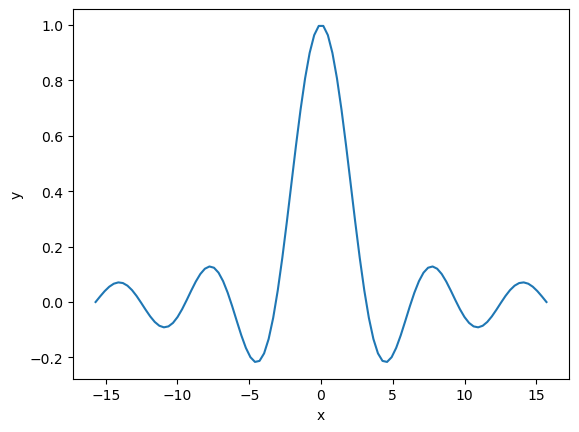

In [701]:
import matplotlib.pyplot as plt

x = np.linspace(-5*np.pi, 5*np.pi, 100)
y = np.sin(x)/x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It may not have been clear before now, but the call <code>linspace(<span style="color: rgb(170, 34, 255); font-weight: bold;">-</span><span style="color: rgb(0, 136, 0);">5</span><span style="color: rgb(170, 34, 255); font-weight: bold;">*</span>np.pi, <span style="color: rgb(0, 136, 0);">5</span><span style="color: rgb(170, 34, 255); font-weight: bold;">*</span>np.pi, <span style="color: rgb(0, 136, 0);">100</span>)</code> was creating a NumPy array of $100$ equally-spaced points between $-5\pi$ and $5\pi$, which was then assigned to a variable <code>x</code>.

In [703]:
x

array([-15.70796327, -15.39063068, -15.07329809, -14.75596549,
       -14.4386329 , -14.12130031, -13.80396772, -13.48663513,
       -13.16930254, -12.85196995, -12.53463736, -12.21730476,
       -11.89997217, -11.58263958, -11.26530699, -10.9479744 ,
       -10.63064181, -10.31330922,  -9.99597663,  -9.67864403,
        -9.36131144,  -9.04397885,  -8.72664626,  -8.40931367,
        -8.09198108,  -7.77464849,  -7.45731589,  -7.1399833 ,
        -6.82265071,  -6.50531812,  -6.18798553,  -5.87065294,
        -5.55332035,  -5.23598776,  -4.91865516,  -4.60132257,
        -4.28398998,  -3.96665739,  -3.6493248 ,  -3.33199221,
        -3.01465962,  -2.69732703,  -2.37999443,  -2.06266184,
        -1.74532925,  -1.42799666,  -1.11066407,  -0.79333148,
        -0.47599889,  -0.1586663 ,   0.1586663 ,   0.47599889,
         0.79333148,   1.11066407,   1.42799666,   1.74532925,
         2.06266184,   2.37999443,   2.69732703,   3.01465962,
         3.33199221,   3.6493248 ,   3.96665739,   4.28

The call <code>np.sin(x)</code> was using NumPy's implementation of the $\sin$ function to apply the sine operation to each of these $100$ values.  Then the division operator <code><span style="color: rgb(170, 34, 255); font-weight: bold;">/</span></code> divides each element of this resulting array by the corresponding element in <code>x</code>.  The returned array is then assigned to variable <code>y</code>.

In [705]:
y

array([ 3.89817183e-17,  2.02742469e-02,  3.93349833e-02,  5.52031619e-02,
        6.61352254e-02,  7.08060947e-02,  6.84586372e-02,  5.90037347e-02,
        4.30592176e-02,  2.19213520e-02, -2.53122070e-03, -2.79947296e-02,
       -5.19462548e-02, -7.18808393e-02, -8.55584459e-02, -9.12376393e-02,
       -8.78731385e-02, -7.52567821e-02, -5.40858425e-02, -2.59486749e-02,
        6.77511052e-03,  4.10950160e-02,  7.36580343e-02,  1.01045753e-01,
        1.20095630e-01,  1.28218630e-01,  1.23684487e-01,  1.05847527e-01,
        7.52900028e-02,  3.38662197e-02, -1.53613875e-02, -6.82940279e-02,
       -1.20066727e-01, -1.65398669e-01, -1.98997981e-01, -2.15989740e-01,
       -2.12332895e-01, -1.85191620e-01, -1.33229231e-01, -5.67982254e-02,
        4.19922876e-02,  1.59341047e-01,  2.89949843e-01,  4.27337795e-01,
        5.64253279e-01,  6.93153891e-01,  8.06718970e-01,  8.98356098e-01,
        9.62663011e-01,  9.95809446e-01,  9.95809446e-01,  9.62663011e-01,
        8.98356098e-01,  

The final call to the <code>plt.plot</code> function simply plots the array <code>x</code> against the array <code>y</code> (permissible, since both arrays have the same shape).

<h3> 2. File I/O </h3>

Revisiting last week's topic, NumPy has functions that allow us to easily read data from, and write data to, text files in our local directory.  The function <code>savetxt</code> accepts a filename (as a string) and an array, and writes the array to a file with the given filename.

As with the built-in <code>.write</code> method that we saw last week, any file that already has that name will be overwritten, which may be something to watch out for.  The main advantage of <code>savetxt</code> however, is that it includes a routine for closing the file once it has finished writing, meaning that this is taken care of for us.

In [707]:
j = np.random.random((5,3))

# NumPy's random module can be used to produce arrays containing (pseudo-)randomly generated data.

np.savetxt('test.txt', j)

Since <samp>test.txt</samp> is simply a text file, we can open it up with the <code>.read</code> method that we saw last week.

In [709]:
with open('test.txt', 'r') as f:
    data = f.read()
    
print(data)

8.398847814253911359e-01 6.621255632085810694e-01 3.827251951620503911e-01
4.500869778299506629e-01 1.819722826444364339e-01 4.345468754093209096e-01
6.451781772497163780e-01 3.816267339680167181e-01 2.069633727293637149e-01
2.372199674935409064e-01 2.918828898751064660e-01 6.981703708558799626e-01
4.089389050563907446e-01 1.286642189469580089e-01 2.673859305319226110e-02



This is perfectly fine, even with the number stored in standard form.  The main issue however, is that the object <code>data</code> is a string, and so we would have to perform a number of computations before we could use it as an array again.  Thankfully, NumPy includes a function <code>loadtxt</code>, which acts as a counter-part to <code>savetxt</code>, reading numerical data from a file and loading it into an array.

In [716]:
k = np.loadtxt('test.txt')

print(k)

[[0.83988478 0.66212556 0.3827252 ]
 [0.45008698 0.18197228 0.43454688]
 [0.64517818 0.38162673 0.20696337]
 [0.23721997 0.29188289 0.69817037]
 [0.40893891 0.12866422 0.02673859]]


We can now verify that this loaded array contains the same data as the array that was used to originally create the file.

In [719]:
j==k

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

The main idea with this is that we can save data that we obtain from our computations, sparing our PC the task of having to recompute everything from scratch.  More functionality is available via alternatives involving binary data, see <a href="https://python-course.eu/numerical-programming/reading-and-writing-data-files-ndarrays.php">here</a> for more information.

<h3> 3. Linear Equations </h3>

One of the most common uses of NumPy arrays is to act as implementations of vectors and matrices, objects commonly seen in linear algebra.  These constructions can themselves be shorthands for encoding data from linear equations.  Given that this is material from <em>MTH4215 Vectors &amp; Matrices</em>, we will not go into full detail about this, but an example will signpost useful modules, functions and operations for future reference.

Suppose we wish to solve $n$ simultaneous linear equations in $n$ unknowns.  For $n=2$, this could be a pair of equations such as

\begin{align*}
3x_0 + 2x_1 &= 6\;,\\
-x_0 + 4x_1 &= 2\;.
\end{align*}

Such equations are (comparatively) easy to solve for $n = 2$ or even $n = 3$.  We may howver, need a computer for much larger values of $n$.  We can collect all of the coefficients of the algebraic terms and collate them into a $2\times 2$ array, $A$.

$$A = \begin{pmatrix} 3&2\\ -1&4\end{pmatrix}\;.$$

The values on the right-hand side form a one-dimensional array $\mathbf{b} = \begin{pmatrix} 6\\ 2\end{pmatrix}$ of size $2$, and the unknown terms form a one-dimensional array $\mathbf{x} = \begin{pmatrix} x_0\\ x_1\end{pmatrix}$, also of size $2$.  We can now implement this arrangement in NumPy.

In [722]:
a = np.array([[3,2],[-1,4]])
b = np.array([6,2])

print(a)
print()
print(b)

[[ 3  2]
 [-1  4]]

[6 2]


Now that we have defined <code>a</code> and <code>b</code>, we need to identify a routine that can use this data to solve the linear system.  The <em>SciPy</em> package as a module called <samp>linalg</samp> that contains a function that can do this for us.

In [725]:
import scipy.linalg as la

x = la.solve(a, b)

print(x)

[1.42857143 0.85714286]


We could verify that these values equate to $\frac{10}{7}$ and $\frac{6}{7}$, and we can check to see whether such values solve our system by substituting them back into the equations:

\begin{align*}
3\frac{10}{7}+2\frac{6}{7} &= \frac{42}{7} = 6 \\
-\frac{10}{7}+4\frac{6}{7} &= \frac{14}{7} = 2
\end{align*}

Exactly as required!  But now that we know how to solve such a system with the help of a computer, we needn't stop at $n = 2$.  We can use NumPy's <samp>random</samp> module to generate random coefficients for a $6\times 6$ system of linear equations.

In [727]:
a = np.random.normal(size=(6 ,6))
b = np.random.normal(size=(6))

print(a)
print()
print(b)

[[-3.26419843  2.95023044  0.56149191 -0.67219805 -1.04651707 -0.18411311]
 [-0.6297534  -0.47897736 -1.37547951 -0.17745265  0.87226376  0.50435601]
 [-0.34899605 -1.41303183  0.14619227  1.50320639  0.9717204   0.08593691]
 [ 0.80845406  0.89242358 -0.48481151  0.2157603   0.42001243 -0.99192826]
 [-0.60121737 -0.99421155 -0.0241894  -1.09567163  1.08500806 -0.20273811]
 [-1.81246624  0.08681881 -0.64335616 -0.13561382  0.72177033 -0.4808951 ]]

[-1.20614777  0.96400092 -0.44492498  0.63284198  1.6604622   1.64454922]


We again solve for $x$.

In [729]:
x = la.solve(a, b)

print(x)

[-0.30855839 -1.03015384 -1.13687254 -0.71219515 -0.64459759 -1.68849348]


To check the validity of this proposed solution, we can use matrix multiplication to compute $A\mathbf{x}$ and verify that $A\mathbf{x}=\mathbf{b}$.

In [731]:
print(a@x)
print()
print(b)

[-1.20614777  0.96400092 -0.44492498  0.63284198  1.6604622   1.64454922]

[-1.20614777  0.96400092 -0.44492498  0.63284198  1.6604622   1.64454922]


Success!  Of course, we have overlooked a number of potential complications.  It is possible for a linear system to have no solutions, or infinitely many solutions.  For details on this, we again redirect to <em>MTH4115 Vectors &amp; Matrices</em> next semester.

<h2> Conclusion and Outlook </h2>

<ul>
    <li> NumPy arrays encode multidimensional homogeneous data. </li>
    <li> The <code>.shape</code> attribute gives metadata regarding the lengths of each axis in an array. </li>
    <li> Array methods, such as <code>.reshape</code> can be used to recast numeric data from one array into another array with different axis length. </li>
    <li> NumPy contains functions that implement mathematical operations such as $\sin$, $\cos$, $\exp$, etc.  These are applied to the data on an element-wise basis. </li>
    <li> Arithmetic operations can be applied to NumPy arrays, and are usually undertaken element-by-element.</li>
    <li> Broadcasting is a property by which arrays of incompatible shapes can have certain axes stretched out to become equal during an arithmetic operation.  This can be done when one array has an axis of length $1$.</li>
    <li> NumPy arrays can be indexed with comma-separated indices, or with other NumPy arrays.</li>
    <li> Indexing and slicing can be used to assign new elements to an array. </li>
    <li> Views are copies for which we can change the shape without modifying the original array, but we cannot overwrite the numeric data while leaving the original unchanged. </li>
    <li> Common uses of NumPy include creating plotting data for MatPlotLib, writing and reading numeric data to and from files, and solving systems of linear equations with SciPy.</li>
</ul>

Next week we will introduce the <em>Pandas</em> module, and discuss a new type of object, DataFrames.